In [1]:
!pip install matplotlib

  Using cached matplotlib-3.5.2-cp37-cp37m-macosx_10_9_x86_64.whl (7.3 MB)
  Using cached kiwisolver-1.4.4-cp37-cp37m-macosx_10_9_x86_64.whl (65 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.34.4-py3-none-any.whl (944 kB)
You should consider upgrading via the '/Users/ishibushisatoshi/tetris/.venv/bin/python3.7 -m pip install --upgrade pip' command.


In [14]:
from deepqnet import DeepQNetwork
import numpy as np
import torch
import sys
sys.path.append("../../")

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
!ls test_data/data10.npy

test_data/data10.npy


In [139]:
sample = np.load("test_data/data10.npy")

In [19]:
shape = sample.shape

[-0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.
  6.5  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.
 13.5 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.
 20.5 21.  21.5]


/Users/ishibushisatoshi/tetris/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


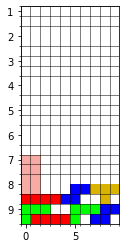

In [151]:
colors = [[255,255,255],
          [255,0,0],
          [0,255,0],
          [255,255,0], 
          [218, 179, 0],
          [247, 171, 166],
          [0,0,255],
          [255,255,0]]
def visualize_block(data,shape):
    block_array = []
    fig, ax = plt.subplots()
    for i in range(shape[0]):
        row = []
        for j in range(shape[1]):
            c = colors[int(data[i][j])]
            row.append(c)
        block_array.append(row)
    block_array = np.array(block_array)
    im = plt.imshow(block_array)
    #ax.set_xticklabels(np.arange(1, 22, 1))
    ax.set_yticklabels(np.arange(0, 22, 1))

    # Minor ticks
    ax.set_xticks(np.arange(-0.5, 10, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, 22, 1), minor=True)
    print(np.arange(-0.5, 22, 0.5))
    # Gridlines based on minor ticks
    ax.grid(which='minor', color='black', linestyle='-', linewidth=0.5)
    ax.imshow(block_array)
visualize_block(sample,shape)


In [142]:
np.save("tutorial_data/data7",sample)

In [50]:
model = torch.load("../../../weight/DQN/sample_weight.pt")

## 盤面の2次元配列を2値化

In [57]:
def get_reshape_backboard(board):
    reshape_board = np.where(board>0,1,0)
    return reshape_board
sample = get_reshape_backboard(sample)

In [60]:
model.eval()
with torch.no_grad():
    predictions = model(sample)

TypeError: conv2d() received an invalid combination of arguments - got (numpy.ndarray, Parameter, NoneType, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!numpy.ndarray!, !Parameter!, !NoneType!, !tuple!, !tuple!, !tuple!, int)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!numpy.ndarray!, !Parameter!, !NoneType!, !tuple!, !tuple!, !tuple!, int)


sample_weight.pt


In [ ]:
def block_sampler(N):
    block= [ np.array([[0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0]]),
             np.array([[[1, 0, 0], [1, 0, 0], [1, 1, 0]]]),
             np.array([[[0, 0, 0], [1, 0, 0], [1, 1, 0]]])
    return 